In [1]:
from platform import python_version

#Graphs packages
from figrecipes import PlotlyFig

#ML packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict

#SVM packages
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score

#Scientific computing and tables
import numpy as np
import pandas as pd
import scipy as sp

#Graphs and visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Package for data normalization
from sklearn.preprocessing import StandardScaler

#Ensemble packages
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance

print(python_version())
%matplotlib inline

3.9.12


In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
synthetic_data = pd.read_csv('synthetic_data.csv', sep = ",")
synthetic_data = synthetic_data.drop(columns=['Unnamed: 0'])

In [4]:
synthetic_data.head()

,w/c_ratio,fiber,concentration,specific_mass,elastic_modulus,fiber_tensile_strength,toughness_factor
0,0.52,7,0.83,1.30,39.0,1600,4.783
1,0.50,1,0.87,7.85,210.0,1000,4.801
2,0.63,3,0.66,0.91,3.5,500,4.816
3,0.40,7,1.34,1.30,39.0,1600,4.818
4,0.38,6,1.84,2.75,95.0,3300,4.834


In [5]:
print(synthetic_data.dtypes)

w/c_ratio                 float64
fiber                       int64
concentration             float64
specific_mass             float64
elastic_modulus           float64
fiber_tensile_strength      int64
toughness_factor          float64
dtype: object


In [6]:
synthetic_data = synthetic_data.drop(columns=['fiber']) #We removed the column referring to the type of fiber

In [7]:
synthetic_data.head()

,w/c_ratio,concentration,specific_mass,elastic_modulus,fiber_tensile_strength,toughness_factor
0,0.52,0.83,1.30,39.0,1600,4.783
1,0.50,0.87,7.85,210.0,1000,4.801
2,0.63,0.66,0.91,3.5,500,4.816
3,0.40,1.34,1.30,39.0,1600,4.818
4,0.38,1.84,2.75,95.0,3300,4.834


In [8]:
print(synthetic_data.dtypes)

w/c_ratio                 float64
concentration             float64
specific_mass             float64
elastic_modulus           float64
fiber_tensile_strength      int64
toughness_factor          float64
dtype: object


# From this point on, data normalization is performed

In [9]:
x1 = synthetic_data.iloc[:,[5]]

In [10]:
x1

,toughness_factor
0,4.783
1,4.801
2,4.816
3,4.818
4,4.834
...,...
1948,4.762
1949,4.765
1950,4.766
1951,4.769


In [11]:
scaler = StandardScaler().fit(x1)

In [12]:
x1 = scaler.transform(x1)

In [13]:
print(x1)

[[0.67597776]
 [0.68652703]
 [0.6953181 ]
 ...
 [0.66601455]
 [0.66777276]
 [0.66953098]]


In [14]:
synthetic_data['toughness_factor'] = x1

In [15]:
synthetic_data

,w/c_ratio,concentration,specific_mass,elastic_modulus,fiber_tensile_strength,toughness_factor
0,0.52,0.83,1.30,39.0,1600,0.675978
1,0.50,0.87,7.85,210.0,1000,0.686527
2,0.63,0.66,0.91,3.5,500,0.695318
3,0.40,1.34,1.30,39.0,1600,0.696490
4,0.38,1.84,2.75,95.0,3300,0.705867
...,...,...,...,...,...,...
1948,0.50,0.51,7.85,210.0,1000,0.663670
1949,0.63,0.78,7.85,210.0,1000,0.665428
1950,0.61,1.02,0.98,5.0,570,0.666015
1951,0.33,0.72,0.91,3.5,500,0.667773


# From this point on, the correlation between the columns is analyzed

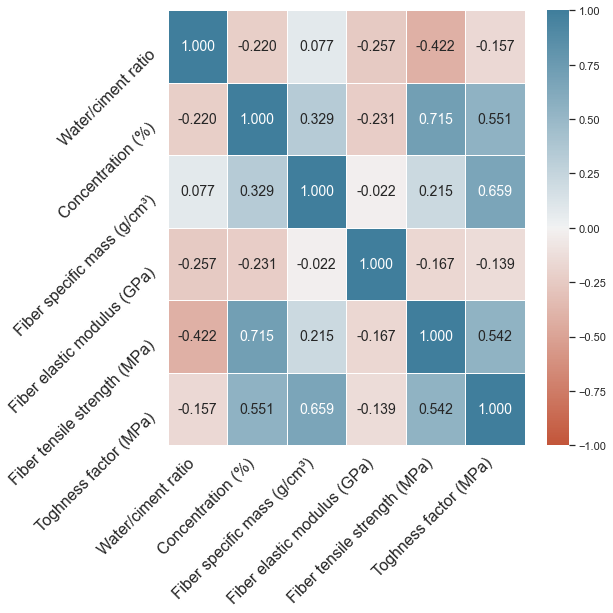

In [16]:
labels = ['Water/ciment ratio', 
          'Concentration (%)', 
          'Fiber specific mass (g/cm³)', 
          'Fiber elastic modulus (GPa)', 
          'Fiber tensile strength (MPa)', 
          'Toghness factor (MPa)']

plt.figure(figsize=(8,8))
sns.set(font_scale=1)
sns.heatmap(synthetic_data.corr(), 
            annot=synthetic_data.corr(), 
            fmt="0.3f", 
            linewidth=1.0, 
            annot_kws={'fontsize':14, 'fontfamily': 'Arial'}, 
            cmap=sns.diverging_palette(20, 230, as_cmap=True), 
            vmin=-1.0, 
            vmax=1.0, 
            xticklabels = labels, 
            yticklabels = labels)

plt.tick_params(axis='both', labelsize=16)
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=45, verticalalignment='top')

plt.show()

# Now train the models, but using synthetic data

In [17]:
#Prepare data for ML
y = synthetic_data['toughness_factor'].values #valores a treinar
x = synthetic_data.drop('toughness_factor', axis=1) #descritores

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
#Creating a multiple linear regression model
lr = LinearRegression()
model=lr.fit(x_train, y_train)

In [20]:
prediction = model.predict(x_test)

In [21]:
r2_score(y_test, model.fit(x_train, y_train).predict(x_test))

0.6183257676413906

In [22]:
#Displays the coefficients
print("Coefficients: \n", model.coef_)
#Displays the R²
print("R²: %.3f" % r2_score(y_test, prediction))
#Displays the RMSE
print("Root mean squared error: %.4f" % np.sqrt(mean_squared_error(y_test, prediction)))

Coefficients: 
 [-6.38184475e-01  2.50855598e-01  2.13252918e-01 -1.05356513e-04
  2.78729857e-04]
R²: 0.618
Root mean squared error: 0.6154


In [23]:
model.intercept_

-0.666854681472468

In [24]:
def FormulaRLM(coefs, intercept):
    formula = "y = "
    for val in coefs:
        if val < 0:
            formula = formula + " - " + str(abs(val))
        else:
            formula = formula + " + " +str(abs(val))  
    
    formula = formula + " + " + str(intercept)    
    return formula

In [25]:
print(FormulaRLM(model.coef_, model.intercept_))

y =  - 0.6381844754119981 + 0.2508555982233113 + 0.21325291844184205 - 0.00010535651309252749 + 0.0002787298569773244 + -0.666854681472468


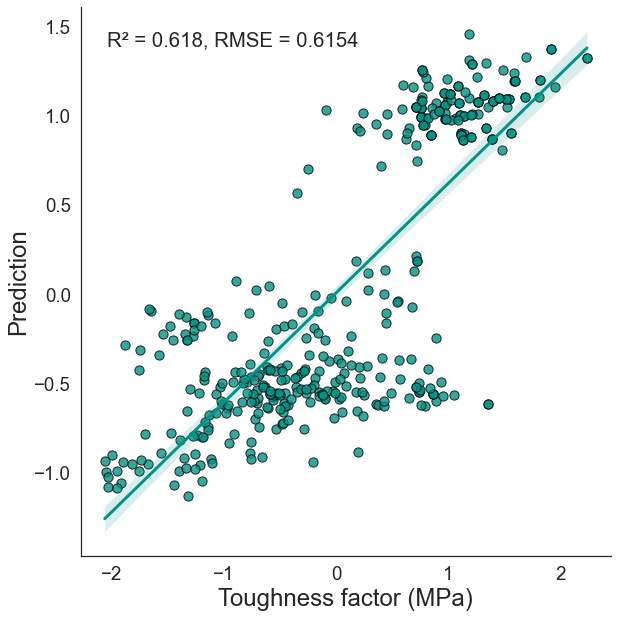

In [26]:
df = pd.DataFrame()
df['Toughness factor (MPa)'] = y_test
df['Prediction'] = prediction

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Toughness factor (MPa)'], data['Prediction'])
    r = r2_score(y_test, prediction)
    err = np.sqrt(mean_squared_error(data['Toughness factor (MPa)'], data['Prediction'], squared=True))
    ax = plt.gca()
    ax.text(.05, 0.93, 'R² = {:.3f}, RMSE = {:.4f}'.format(r, err),
    transform=ax.transAxes)


sns.set(font_scale=1.7)
with sns.axes_style('white'):
    graph = sns.lmplot(x = 'Toughness factor (MPa)',
                       y = "Prediction",
                       ci = 90,
                       data = df,
                       height = 9,
                       aspect = 1,
                       scatter_kws = {'s':85, 'color': '#029386', 'edgecolor': 'black'},
                       line_kws = {'lw': 3, 'color': '#029386'})

graph.set_xlabels('Toughness factor (MPa)', size=24, fontfamily='Arial')
graph.set_ylabels('Prediction', size=24, fontfamily='Arial')

graph.map_dataframe(annotate)


print(graph)

# Here begins Support Vector Regression

In [27]:
#Definition of parameters for the SVR
param = {'kernel' : ('poly', 'rbf'),
         'C' :[1, 5, 10, 100],'degree' : [1, 2, 3],'coef0' : [0, 0.1, 0.5, 1.0],
         'gamma' : [0.01,0.05, 0.1, 0.5, 1],
         'max_iter': [10000]}
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [28]:
#Divide into training and testing (With 20% testing)
x_train_SVR, x_test_SVR, y_train_SVR, y_test_SVR = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
grid = GridSearchCV(SVR(), param_grid=param, cv=cv)

In [30]:
import time

In [31]:
start_time = time.time()
grid.fit(x_train_SVR, y_train_SVR)
end_time = time.time()

In [32]:
print("--- Training lasted % seconds ---" % (end_time - start_time))

--- Training lasted 320.98740315437317econds ---


In [33]:
grid.best_params_

{'C': 5,
 'coef0': 0,
 'degree': 1,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': 10000}

In [34]:
grid.best_score_

0.8670049144856378

In [35]:
grid.best_index_

129

In [36]:
grid_result = pd.DataFrame(grid.cv_results_)

grid_result = grid_result.drop(columns = ['mean_score_time',
                                          'mean_fit_time',
                                          'std_fit_time',
                                          'std_score_time',
                                          'params',
                                          'split0_test_score',
                                          'split1_test_score',
                                          'split2_test_score',
                                          'split3_test_score',
                                          'split4_test_score',
                                          'std_test_score'])

grid_result

,param_C,param_coef0,param_degree,param_gamma,param_kernel,param_max_iter,mean_test_score,rank_test_score
0,1,0,1,0.01,poly,10000,-1.678602e+01,242
1,1,0,1,0.01,rbf,10000,8.233208e-01,229
2,1,0,1,0.05,poly,10000,-3.051787e+01,247
3,1,0,1,0.05,rbf,10000,8.501744e-01,217
4,1,0,1,0.1,poly,10000,-7.594159e+01,263
...,...,...,...,...,...,...,...,...
475,100,1.0,3,0.1,rbf,10000,8.651802e-01,73
476,100,1.0,3,0.5,poly,10000,-6.682582e+31,475
477,100,1.0,3,0.5,rbf,10000,8.652032e-01,61
478,100,1.0,3,1,poly,10000,-8.465140e+33,480


In [37]:
grid_result = grid_result.rename(columns = {'param_C': 'C',
                                            'param_coef0': 'Coef0',
                                            'param_degree': 'Degree',
                                            'param_gamma': 'Gamma',
                                            'param_kernel': 'Kernel',
                                            'param_max_iter': 'Max iter',
                                            'mean_test_score': 'Average test score',
                                            'rank_test_score': 'Test score rank'})

pd.options.display.float_format = '{:.3f}'.format

grid_result

,C,Coef0,Degree,Gamma,Kernel,Max iter,Average test score,Test score rank
0,1,0,1,0.010,poly,10000,-16.786,242
1,1,0,1,0.010,rbf,10000,0.823,229
2,1,0,1,0.050,poly,10000,-30.518,247
3,1,0,1,0.050,rbf,10000,0.850,217
4,1,0,1,0.100,poly,10000,-75.942,263
...,...,...,...,...,...,...,...,...
475,100,1.000,3,0.100,rbf,10000,0.865,73
476,100,1.000,3,0.500,poly,10000,-66825823133138301407741085745152.000,475
477,100,1.000,3,0.500,rbf,10000,0.865,61
478,100,1.000,3,1,poly,10000,-8465139676047471202434134338174976.000,480


In [38]:
grid_result.to_excel("grid_result.xlsx")

In [39]:
grid.best_estimator_

SVR(C=5, coef0=0, degree=1, gamma=1, max_iter=10000)

In [40]:
grid.best_estimator_.fit(x_train_SVR,y_train_SVR)
prediction_SVR = grid.best_estimator_.predict(x_test_SVR)

In [41]:
print(prediction_SVR)
print(y_test_SVR)

[-0.45633188 -0.93711164 -1.13931127 -0.85248398  1.78464747  1.03584993
 -1.02679301  1.26698923 -0.55049674  1.28209962  1.16404994 -0.29793411
  0.11916236 -1.72057733 -0.89093365 -0.90458596  1.10920535  1.16660271
 -0.31114218  1.3859259  -0.02830011  1.27961702 -0.11852856 -1.82958379
 -0.71997624 -0.85483315  0.40853333  1.45453002 -0.11629904  1.0167322
  0.89895013 -1.54649968 -0.8961338  -0.60944625 -1.50943829 -0.31381023
  1.11979457 -0.89093365 -0.22021276  1.20177652 -0.18611965 -0.55443375
  1.0315625   0.32379397  0.62261126  0.79915571  0.23981912 -1.12934698
 -0.24447174 -0.37259508 -0.99879873 -0.21575455 -0.86631997  0.74961666
  1.11979457  1.20177652  1.02361682  0.8098397   1.07493758  0.03351616
  0.63400239  0.05298878  0.29946521  0.88379065  0.97336072 -1.5488048
  1.17392753 -0.59220583  0.08955896 -1.55362324 -0.58977507 -0.18295755
 -1.25972726  0.62382322 -0.60400461 -1.36919587  0.42249575 -1.78188905
  1.20132732 -0.77356015 -0.77108929 -0.45500405  0.4

In [42]:
print(grid.best_estimator_.score(x_train_SVR, y_train_SVR))

0.8792229667156846


In [43]:
print(grid.best_estimator_.score(x_test_SVR, y_test_SVR))

0.8550345580706179


In [44]:
pred = grid.best_estimator_.predict(x)

In [45]:
print(pred)
print(y)

[-0.02412305  1.08468375  0.59587868 ...  0.16811866  0.31285296
  0.5753845 ]
[0.67597776 0.68652703 0.6953181  ... 0.66601455 0.66777276 0.66953098]


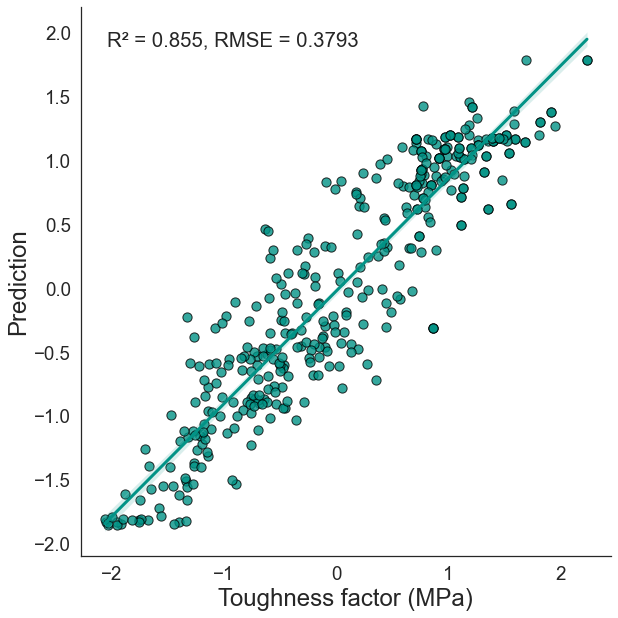

In [46]:
df = pd.DataFrame()
df['Toughness factor (MPa)'] = y_test_SVR
df['Prediction'] = prediction_SVR

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Toughness factor (MPa)'], data['Prediction'])
    r = r2_score(y_test_SVR, prediction_SVR)
    err = np.sqrt(mean_squared_error(data['Toughness factor (MPa)'], data['Prediction'], squared=True))
    ax = plt.gca()
    ax.text(.05, 0.93, 'R² = {:.3f}, RMSE = {:.4f}'.format(r, err),
    transform=ax.transAxes)


sns.set(font_scale=1.7)
with sns.axes_style('white'):
    graph = sns.lmplot(x = 'Toughness factor (MPa)',
                       y = "Prediction",
                       ci = 90,
                       data = df,
                       height = 9,
                       aspect = 1,
                       scatter_kws = {'s':85, 'color': '#029386', 'edgecolor': 'black'},
                       line_kws = {'lw': 3, 'color': '#029386'})

graph.set_xlabels('Toughness factor (MPa)', size=24, fontfamily='Arial')
graph.set_ylabels('Prediction', size=24, fontfamily='Arial')

graph.map_dataframe(annotate)


print(graph)